In [1]:
from sklearn.datasets import load_iris
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.functional as F
import torchvision
import torchvision.transforms as T

In [2]:
batch_size_train = 64
batch_size_test = 64
torch.manual_seed(17)

In [3]:
# Load the MNIST train dataset
train_dataset = torchvision.datasets.MNIST('.', 
                                            train=True, 
                                            download=True,
                                            transform=T.Compose([
                                            T.ToTensor()
                                            ]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
# Load the MNIST test ain dataset
test_dataset = torchvision.datasets.MNIST('.', 
                                            train=False, 
                                            download=False,
                                            transform=T.Compose([
                                            T.ToTensor()
                                            ]))

In [24]:
# Create batches of train and test datasets using dataloader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size_train,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size_test,
                                           shuffle = False)  

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


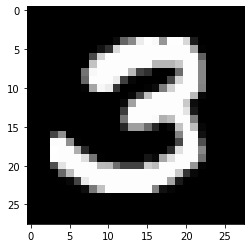

Label: 3


In [40]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


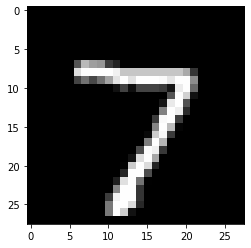

Label: 7


In [52]:
# Display image and label random test data.
test_features, test_labels = next(iter(test_loader))
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")
img = test_features[0].squeeze()
label = test_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [9]:
# Find min and max to ensure that normalization is applied on image data with mean as 0 and std as 1
print(f'The max value of the input feature is {train_features.max():0.2f} and min value is {train_features.min():0.2f}')

The max value of the input feature is 1.00 and min value is 0.00


In [10]:
# Check whether gpu is available 
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [88]:
# Define the model
# As we are using CrossEntropyLoss, we do not require sof
model = nn.Sequential(
          nn.Linear(784, 128),
          nn.ReLU(),
          nn.Linear(128, 10),
        )

In [89]:
# Move model to device
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [90]:
# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [91]:
n_epochs = 20
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for epoch in range(n_epochs):
  train_loss = []
  for inputs, targets in train_loader:
    # Training data
    
    # Move tensors to targeted device
    inputs = inputs.to(device)
    targets = targets.to(device)

    optimizer.zero_grad()
    
    # Flatten input to a vector with same batch size
    inputs = inputs.view(-1, 28 * 28)
    
    # Perform feed foroward and calculate loss
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Perform backward propagation and update parameters
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  # Test data
  test_loss = []
  for test_inputs, test_targets in test_loader:
    # Move tensors to targeted devices
    test_inputs = test_inputs.to(device)
    test_targets = test_targets.to(device)

    # Flatten input to a vector with same batch size
    test_inputs = test_inputs.view(-1, 28 * 28)

    # Find out predictions for test data
    test_outputs = model(test_inputs)
    loss = criterion(test_outputs, test_targets)
    
    test_loss.append(loss.item())

  train_loss_per_epoch = np.mean(train_loss)
  train_losses[epoch] = train_loss_per_epoch
  
  test_loss_per_epoch = np.mean(test_loss)
  test_losses[epoch] = test_loss_per_epoch

  print(f'Epoch : {epoch+1}/{n_epochs} -  Training Loss: {train_loss_per_epoch:.4f} Test Loss: {test_loss_per_epoch:.4f}')

Epoch : 1/20 -  Training Loss: 0.3452 Test Loss: 0.2051
Epoch : 2/20 -  Training Loss: 0.1614 Test Loss: 0.1366
Epoch : 3/20 -  Training Loss: 0.1127 Test Loss: 0.1041
Epoch : 4/20 -  Training Loss: 0.0848 Test Loss: 0.0915
Epoch : 5/20 -  Training Loss: 0.0671 Test Loss: 0.0828
Epoch : 6/20 -  Training Loss: 0.0520 Test Loss: 0.0781
Epoch : 7/20 -  Training Loss: 0.0426 Test Loss: 0.0774
Epoch : 8/20 -  Training Loss: 0.0350 Test Loss: 0.0723
Epoch : 9/20 -  Training Loss: 0.0286 Test Loss: 0.0710
Epoch : 10/20 -  Training Loss: 0.0234 Test Loss: 0.0714
Epoch : 11/20 -  Training Loss: 0.0205 Test Loss: 0.0743
Epoch : 12/20 -  Training Loss: 0.0163 Test Loss: 0.0740
Epoch : 13/20 -  Training Loss: 0.0131 Test Loss: 0.0784
Epoch : 14/20 -  Training Loss: 0.0121 Test Loss: 0.0845
Epoch : 15/20 -  Training Loss: 0.0095 Test Loss: 0.0779
Epoch : 16/20 -  Training Loss: 0.0087 Test Loss: 0.0827
Epoch : 17/20 -  Training Loss: 0.0073 Test Loss: 0.0897
Epoch : 18/20 -  Training Loss: 0.0077 T

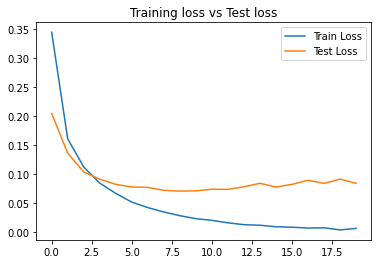

In [92]:
# Plot the training loss vs test loss
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.title('Training loss vs Test loss')
plt.show()

In [93]:
# Calculate accuracy of the model
test_accuracy = []
model.eval()
with torch.no_grad():
  # Training accuracy 
  train_correct = 0.
  train_total = 0.

  # Iterate over train data in batches
  for inputs, targets in train_loader:
    inputs = inputs.to(device)
    targets = targets.to(device)
    inputs = inputs.view(-1, 28 * 28)
    outputs = model(inputs)
    train_pred = torch.argmax(outputs, dim = 1)
    train_correct += train_pred.eq(targets).sum().item()
    train_total += targets.shape[0]

  # Test accuracy
  test_correct = 0.
  test_total = 0.

  # Iterate over test data in batches
  for test_inputs, test_targets in test_loader:
    test_inputs = test_inputs.to(device)
    test_targets = test_targets.to(device)
    test_inputs = test_inputs.view(-1, 28 * 28)
    test_outputs = model(test_inputs)
    test_pred = torch.argmax(test_outputs, dim = 1)
    test_correct += test_pred.eq(test_targets).sum().item()
    test_total += test_targets.shape[0]
    
# Calculate model's accuracy over training and test datasets
train_acc = train_correct/train_total
test_acc = test_correct/test_total

print(f"Training data accuracy : {train_acc:.4f} and Test data accuracy : {test_acc:.4f}")

Training data accuracy : 0.9986 and Test data accuracy : 0.9795
